<a href="https://colab.research.google.com/github/Braelin2/ECGR5101HW4/blob/main/5105_HW4_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/My Drive/ECGR5105/cancer.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))

In [3]:
convlist =  ['diagnosis']
# Defining the map function
def binary_map(x):
    return x.map({'M': 1, 'B': 0})

# Applying the function to the housing list
dataset[convlist] = dataset[convlist].apply(binary_map)

In [4]:
X = dataset.iloc[:, 2:32].values
Y = dataset.iloc[:, 1].values

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 100)

X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

The most accurate K value is:  4
Accuracy:  0.9473684210526315


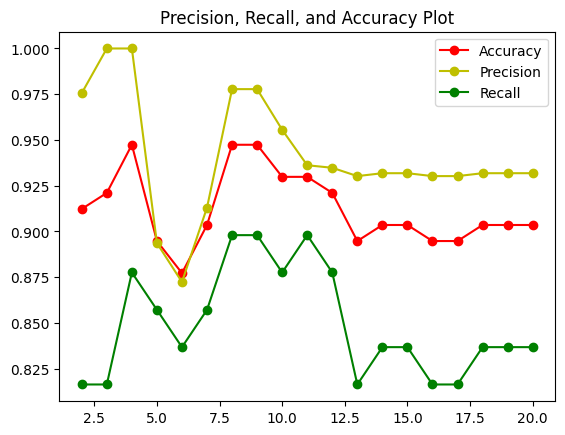

In [12]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.svm import SVC

#setting up a function for PCA reduction
def pcaRedux(x_train,x_test,k):
  pca = PCA(n_components = k)
  x_train1 = pca.fit_transform(x_train)
  x_test1 = pca.fit_transform(x_test)
  return x_train1,x_test1

highest_accuracy = 0
accuracy = []
precision = []
recall = []
k_vals = []

for k in range(1,31):
  x_train1, x_test1 = pcaRedux(X_train,X_test,k)
  svc_pca = SVC(kernel= 'poly', C=1E6)
  svc_pca.fit(x_train1,Y_train)
  Prediction = svc_pca.predict(x_test1)

  accuracy.append(metrics.accuracy_score(Y_test, Prediction))
  precision.append(metrics.precision_score(Y_test, Prediction))
  recall.append(metrics.recall_score(Y_test, Prediction))
  k_vals.append(k);

  if(metrics.accuracy_score(Y_test, Prediction) > highest_accuracy):
    highest_accuracy = metrics.accuracy_score(Y_test, Prediction)
    best_k = k

print("The most accurate K value is: ", best_k)
print("Accuracy: ", highest_accuracy)

plt.plot(k_vals[1:20], accuracy[1:20], 'ro', linestyle = '-', label = 'Accuracy')
plt.plot(k_vals[1:20], precision[1:20], 'yo', linestyle = '-', label = 'Precision')
plt.plot(k_vals[1:20], recall[1:20], 'go', linestyle = '-', label = 'Recall')

plt.legend(loc = 'upper right')
plt.title("Precision, Recall, and Accuracy Plot")
plt.show()

In [14]:
#Getting the x arrays using PCA
X_train_K, X_test_K = pcaRedux(X_train,X_test, best_k)

#Linear Kernelization
linear_pca = SVC(kernel='linear', C=1E6)
linear_pca.fit(X_train_K, Y_train)
Y_linear = linear_pca.predict(X_test_K)

linear_recall = metrics.recall_score(Y_test, Y_linear)
linear_precision = metrics.precision_score(Y_test, Y_linear)
linear_accuracy = metrics.accuracy_score(Y_test, Y_linear)

print("Recall using linear kernelization: ", linear_recall)
print("Precision using linear kernelization: ", linear_precision)
print("Accuracy using linear kernelization: ", linear_accuracy)

#Poly Kernelization
poly_pca = SVC(kernel='poly', C=1E6)
poly_pca.fit(X_train_K, Y_train)
Y_poly = poly_pca.predict(X_test_K)

poly_recall = metrics.recall_score(Y_test, Y_poly)
poly_precision = metrics.precision_score(Y_test, Y_poly)
poly_accuracy = metrics.accuracy_score(Y_test, Y_poly)

print("Recall using poly kernelization: ", poly_recall)
print("Precision using poly kernelization: ", poly_precision)
print("Accuracy using poly kernelization: ", poly_accuracy)

#RBF Kernelization
rbf_pca = SVC(kernel='rbf', C=1E6)
rbf_pca.fit(X_train_K, Y_train)
Y_rbf = rbf_pca.predict(X_test_K)

rbf_recall = metrics.recall_score(Y_test, Y_rbf)
rbf_precision = metrics.precision_score(Y_test, Y_rbf)
rbf_accuracy = metrics.accuracy_score(Y_test, Y_rbf)

print("Recall using rbf kernelization: ", rbf_recall)
print("Precision using rbf kernelization: ", rbf_precision)
print("Accuracy using rbf kernelization: ", rbf_accuracy)

#Sigmoid Kernelization
sigmoid_pca = SVC(kernel='sigmoid', C=1E6)
sigmoid_pca.fit(X_train_K, Y_train)
Y_sigmoid = sigmoid_pca.predict(X_test_K)

sigmoid_recall = metrics.recall_score(Y_test, Y_sigmoid)
sigmoid_precision = metrics.precision_score(Y_test, Y_sigmoid)
sigmoid_accuracy = metrics.accuracy_score(Y_test, Y_sigmoid)

print("Recall using sigmoid kernelization: ", sigmoid_recall)
print("Precision using sigmoid kernelization: ", sigmoid_precision)
print("Accuracy using sigmoid kernelization: ", sigmoid_accuracy)


Recall using linear kernelization:  0.8571428571428571
Precision using linear kernelization:  1.0
Accuracy using linear kernelization:  0.9385964912280702
Recall using poly kernelization:  0.8775510204081632
Precision using poly kernelization:  1.0
Accuracy using poly kernelization:  0.9473684210526315
Recall using rbf kernelization:  0.8163265306122449
Precision using rbf kernelization:  0.9302325581395349
Accuracy using rbf kernelization:  0.8947368421052632
Recall using sigmoid kernelization:  0.8367346938775511
Precision using sigmoid kernelization:  0.9761904761904762
Accuracy using sigmoid kernelization:  0.9210526315789473


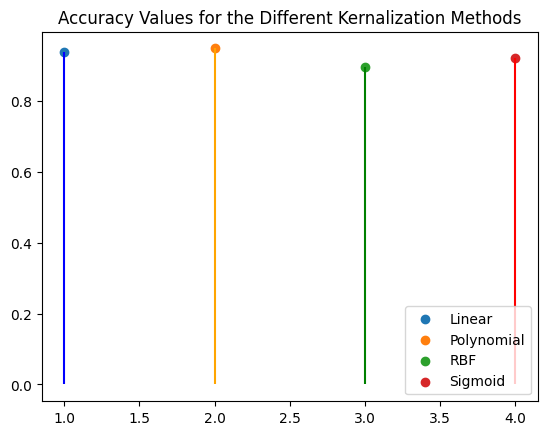

In [15]:
#Plotting Accuracies for the different kernalization methods
plt.scatter(1, linear_accuracy , label = 'Linear')
plt.scatter(2, poly_accuracy , label = 'Polynomial')
plt.scatter(3, rbf_accuracy , label = 'RBF')
plt.scatter(4, sigmoid_accuracy, label = 'Sigmoid')

line_colors = ['blue', 'orange', 'green', 'red']

# Add vertical lines
for x, y, color in zip([1, 2, 3, 4], [linear_accuracy, poly_accuracy, rbf_accuracy, sigmoid_accuracy], line_colors):
    plt.vlines(x, 0, y, colors=color, linestyles='-', alpha=1)

plt.legend(loc = 'lower right')
plt.title("Accuracy for Different Kernalization Methods")
plt.show()